Investigating trends in animal bites in a small town in Louiseville, Kentucky. Data available from Kaggle:
https://www.kaggle.com/rtatman/animal-bites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [49]:
#import dataset
data = pd.read_csv('Health_AnimalBites.csv')
data.sort_values('bite_date', ascending=False).head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
4490,5013-07-15 00:00:00,DOG,GERM SHEPHERD,FEMALE,WHITE,1.0,2013-08-05 00:00:00,40216,NaN,BODY,NaN,NaN,NaN,NaN,NaN
6505,2201-05-01 00:00:00,DOG,DACHSHUND,MALE,BROWN,1.0,2015-05-19 00:00:00,40229,NO,BODY,NaN,RELEASED,NaN,2015-05-11 00:00:00,NaN
6293,2201-02-21 00:00:00,DOG,PIT BULL,MALE,TAN WHITE,1.0,2015-04-21 00:00:00,NaN,NaN,BODY,NaN,NaN,NaN,NaN,NaN
5055,2201-01-21 00:00:00,CAT,NaN,MALE,GRAY,NaN,NaN,NaN,NaN,HEAD,NaN,NaN,NaN,NaN,NaN
1512,2101-02-18 00:00:00,CAT,NaN,FEMALE,BLACK,NaN,NaN,40202,NaN,BODY,2011-02-18 00:00:00,RELEASED,NaN,NaN,NaN


In [50]:
#looks like there are quite a impossible dates for bites. 
#check how many dates there are before removing the spurious ones. 
len(data['bite_date'].unique())

2703

In [51]:
#and how many rows?
len(data)

9003

In [52]:
type(data['bite_date'][0])

str

In [42]:
#turn the 'bite_date' column to datetime so that it is easier to work with

In [34]:
pd.to_datetime(data['bite_date'])
#ouch! Error.

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 5013-07-15 00:00:00

In [53]:
#OK, pandas can't handle dates from the year 5000. 
#drop that year....
data[data['bite_date']=='5013-07-15 00:00:00']

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
4490,5013-07-15 00:00:00,DOG,GERM SHEPHERD,FEMALE,WHITE,1.0,2013-08-05 00:00:00,40216,NaN,BODY,NaN,NaN,NaN,NaN,NaN


In [54]:
len(data)

9003

In [55]:
data = data.drop([4490])

In [56]:
len(data)

9002

In [57]:
#now we can convert the bite_date column to datetime
data['bite_date'] = pd.to_datetime(data['bite_date'])

In [81]:
#check that it worked
type(data['bite_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [74]:
#how many impossible dates are there? (the dataset is at least a year old, so cutoff is 2017)
len(data[data['bite_date'].dt.year > 2017])

7

In [73]:
#how many entries have null value for year?
len(data[data['bite_date'].isna()])

317

In [76]:
#let's drop NAs and impossible years. 
data = data[data['bite_date'].dt.year <= 2017]

In [77]:
len(data)

8678

In [9]:
#alternative, or dropna(subset=['bite_date'])
#data_years = data[pd.notna(data['bite_date'])]

In [78]:
data.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [80]:
#check they are gone
data[data['bite_date'].isnull()]

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc


In [82]:
#make a year column, so we can plot bites by year
data['year'] = data['bite_date'].dt.year

In [83]:
#check the column has appeared
data.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc,year
0,1985-05-05,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,1985
1,1986-02-12,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,1986
2,1987-05-07,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,1987
3,1988-10-02,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,1988
4,1989-08-29,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN,1989


In [91]:
#how do the bites break down by year?
data['year'].value_counts().sort_index()

1952       2
1985       1
1986       1
1987       1
1988       1
1989       2
1990       6
1991       5
1992      10
1993       6
1994       7
1995       1
1999       1
2001       1
2002       1
2007       1
2009      14
2010    1131
2011    1148
2012    1180
2013    1145
2014    1176
2015     985
2016    1051
2017     801
Name: year, dtype: int64

In [ ]:
#OK. So EITHER we are missing some data between 1952 and 2009, or we are dealing with a full-scale animal uprising from 2017.

Text(0.5,0,'Year')

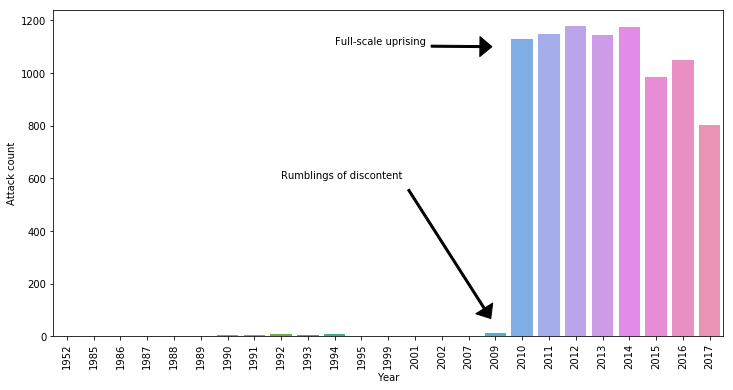

In [88]:
#plot the data
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x='year', data = data, ax = ax)
plt.xticks(rotation='vertical')
#plt.xlim(left = 1992)
plt.annotate('Rumblings of discontent', xy=(16,40), xytext=(8, 600),
             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=2))
plt.annotate('Full-scale uprising', xy=(16,1100), xytext=(10, 1110),
             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=2))
plt.ylabel('Attack count')
plt.xlabel('Year')
#ax.annotate('x', (2012, 600))

In [19]:
#it looks like only the 2010-2017 years carry valuable data. let's strip down to those years. 

In [92]:
core = data[(data['year'] > 2009) & (data['year'] < 2018)]

Text(0.5,0,'Year')

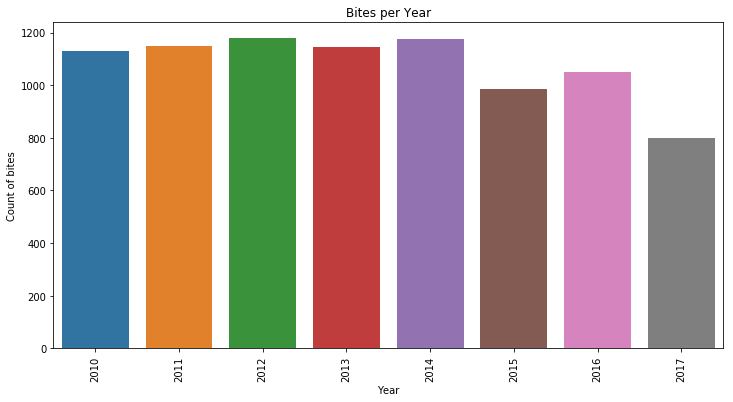

In [93]:
#take a closer look for bites in the core years
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x='year', data = core, ax = ax)
plt.xticks(rotation='vertical')
plt.title('Bites per Year')
plt.ylabel('Count of bites')
plt.xlabel('Year')

In [ ]:
#what proportion of these were dog bites? Look using a stacked bar plot

In [94]:
core.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc,year
54,2010-01-01,DOG,NaN,FEMALE,WHT,1.0,2009-10-22 00:00:00,40228,NO,BODY,2010-01-04 00:00:00,RELEASED,NaN,NaN,UNKNOWN,2010
55,2010-01-02,DOG,NaN,MALE,BLK-BRN,3.0,2008-02-07 00:00:00,40291,NO,HEAD,2010-01-04 00:00:00,RELEASED,NaN,NaN,UNKNOWN,2010
56,2010-01-02,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,YES,BODY,2010-01-04 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,2010
57,2010-01-02,CAT,NaN,FEMALE,NaN,NaN,NaN,40291,NO,BODY,2010-01-04 00:00:00,RELEASED,NaN,NaN,UNKNOWN,2010
58,2010-01-02,DOG,NaN,UNKNOWN,BLK,NaN,NaN,40216,NO,BODY,2010-01-04 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,2010


In [ ]:
#manipulate the table so that it can be stacked

In [96]:
stacked = core.groupby(['year', 'SpeciesIDDesc']).size().reset_index().pivot(columns = 'SpeciesIDDesc', index = 'year', values=0)
stacked

SpeciesIDDesc,BAT,CAT,DOG,FERRET,HORSE,OTHER,RABBIT,RACCOON,SKUNK
year,,,,,,,,,
2010,10.0,224.0,892.0,NaN,NaN,3.0,NaN,2.0,NaN
2011,11.0,216.0,907.0,NaN,1.0,2.0,1.0,6.0,NaN
2012,NaN,200.0,930.0,NaN,NaN,1.0,1.0,NaN,1.0
2013,5.0,223.0,903.0,NaN,NaN,1.0,1.0,NaN,NaN
2014,6.0,203.0,942.0,NaN,NaN,NaN,NaN,4.0,NaN
2015,8.0,176.0,790.0,1.0,1.0,NaN,NaN,2.0,NaN
2016,22.0,168.0,850.0,1.0,2.0,1.0,NaN,5.0,NaN
2017,14.0,117.0,657.0,2.0,1.0,NaN,NaN,2.0,NaN


In [97]:
#reorder columns so that the animals of most interest appear first
stacked.columns.values

array(['BAT', 'CAT', 'DOG', 'FERRET', 'HORSE', 'OTHER', 'RABBIT',
       'RACCOON', 'SKUNK'], dtype=object)

In [98]:
cols = ['DOG', 'CAT', 'BAT', 'FERRET', 'HORSE', 'RABBIT',
       'RACCOON', 'SKUNK', 'OTHER']

In [99]:
stacked = stacked[cols]
stacked

SpeciesIDDesc,DOG,CAT,BAT,FERRET,HORSE,RABBIT,RACCOON,SKUNK,OTHER
year,,,,,,,,,
2010,892.0,224.0,10.0,NaN,NaN,NaN,2.0,NaN,3.0
2011,907.0,216.0,11.0,NaN,1.0,1.0,6.0,NaN,2.0
2012,930.0,200.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0
2013,903.0,223.0,5.0,NaN,NaN,1.0,NaN,NaN,1.0
2014,942.0,203.0,6.0,NaN,NaN,NaN,4.0,NaN,NaN
2015,790.0,176.0,8.0,1.0,1.0,NaN,2.0,NaN,NaN
2016,850.0,168.0,22.0,1.0,2.0,NaN,5.0,NaN,1.0
2017,657.0,117.0,14.0,2.0,1.0,NaN,2.0,NaN,NaN


Text(0,0.5,'Count of Bites')

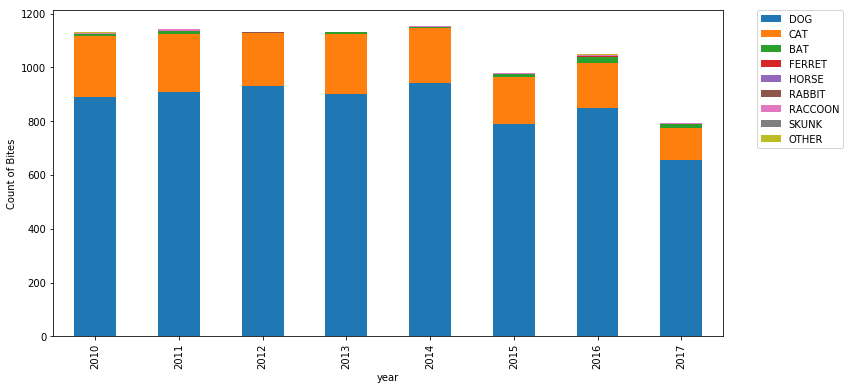

In [123]:
fig, ax = plt.subplots(figsize = (12,6))
stacked.plot.bar(stacked=True, ax = ax)
#plt.legend(loc='lower right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Count of Bites')

In [29]:
#dogs and cats clearly dominate here. let's get rid of them to see the underlying distributions. 

In [101]:
drop_dog = stacked.drop(['DOG', 'CAT'], axis = 1)

Text(0,0.5,'Count of Bites')

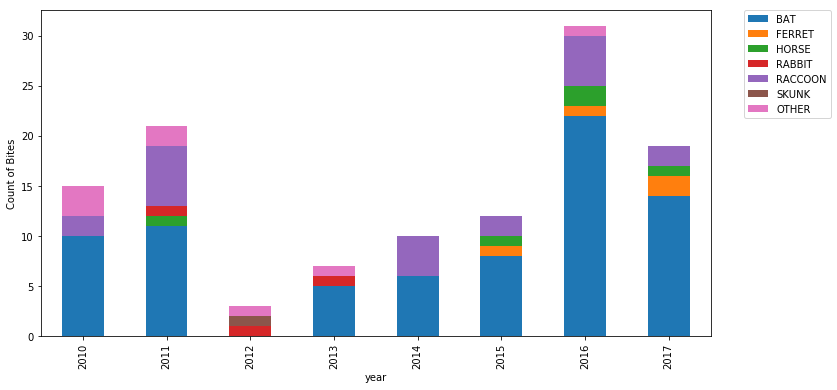

In [124]:
fig, ax = plt.subplots(figsize = (12,6))
drop_dog.plot.bar(stacked=True, ax = ax)
#plt.legend(loc='lower right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Count of Bites')

In [ ]:
#I wonder what happened to all the bats in 2012?

In [ ]:
#getting back to dogs, let's have a deeper dive into which dog breeds were biting

In [105]:
dog = core[core['SpeciesIDDesc']=='DOG']

In [106]:
dog.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc,year
54,2010-01-01,DOG,NaN,FEMALE,WHT,1.0,2009-10-22 00:00:00,40228,NO,BODY,2010-01-04 00:00:00,RELEASED,NaN,NaN,UNKNOWN,2010
55,2010-01-02,DOG,NaN,MALE,BLK-BRN,3.0,2008-02-07 00:00:00,40291,NO,HEAD,2010-01-04 00:00:00,RELEASED,NaN,NaN,UNKNOWN,2010
56,2010-01-02,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,YES,BODY,2010-01-04 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,2010
58,2010-01-02,DOG,NaN,UNKNOWN,BLK,NaN,NaN,40216,NO,BODY,2010-01-04 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,2010
59,2010-01-02,DOG,NaN,FEMALE,BRN-WHT,1.0,2010-01-27 00:00:00,40071,NO,HEAD,2010-01-06 00:00:00,RELEASED,NaN,NaN,UNKNOWN,2010


In [107]:
#make a table appropriate for stacking, using the dog breeds
dgstack = dog.groupby(['year', 'BreedIDDesc']).size().reset_index().pivot(columns = 'BreedIDDesc', index = 'year', values = 0)

In [108]:
dgstack

BreedIDDesc,AAUST. TERR.,AIREDALE TER.,AKITA,ALASK. MALAMUTE,AM BULLDOG,AM. ESKIMO,AMER FOX HOUND,AMER. BULL DOG,BASANJI,BASSET HOUND,...,SPITZ,ST BERNARD,STAN POODLE,TOY FOX TERRIER,TOY POODLE,WEIMARANER,WEINER DOG,WELSH CORGI,WESTIE,YORKSHIRE TERRIER
year,,,,,,,,,,,,,,,,,,,,,
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,4.0,2.0,5.0,NaN,8.0,1.0,NaN,2.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,1.0,5.0
2012,11.0,NaN,8.0,1.0,1.0,NaN,NaN,2.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,3.0,2.0,5.0
2013,12.0,NaN,4.0,3.0,3.0,NaN,NaN,4.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,7.0
2014,7.0,NaN,5.0,1.0,6.0,NaN,NaN,3.0,2.0,3.0,...,1.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,4.0,8.0
2015,21.0,1.0,NaN,1.0,2.0,NaN,NaN,2.0,2.0,7.0,...,NaN,4.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,9.0
2016,7.0,NaN,2.0,1.0,4.0,2.0,NaN,5.0,NaN,NaN,...,1.0,NaN,1.0,1.0,1.0,2.0,NaN,2.0,NaN,8.0
2017,15.0,NaN,3.0,2.0,2.0,1.0,1.0,3.0,NaN,3.0,...,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,1.0,4.0


In [114]:
#it seems that almost all the breed descriptions are missing for 2010, so we will have to drop that year. 
dog[dog['year']==2010]['BreedIDDesc'].unique()

array([nan, 'GERM SHEPHERD'], dtype=object)

In [43]:
#drop first row
dgstack = dgstack.iloc[1:]

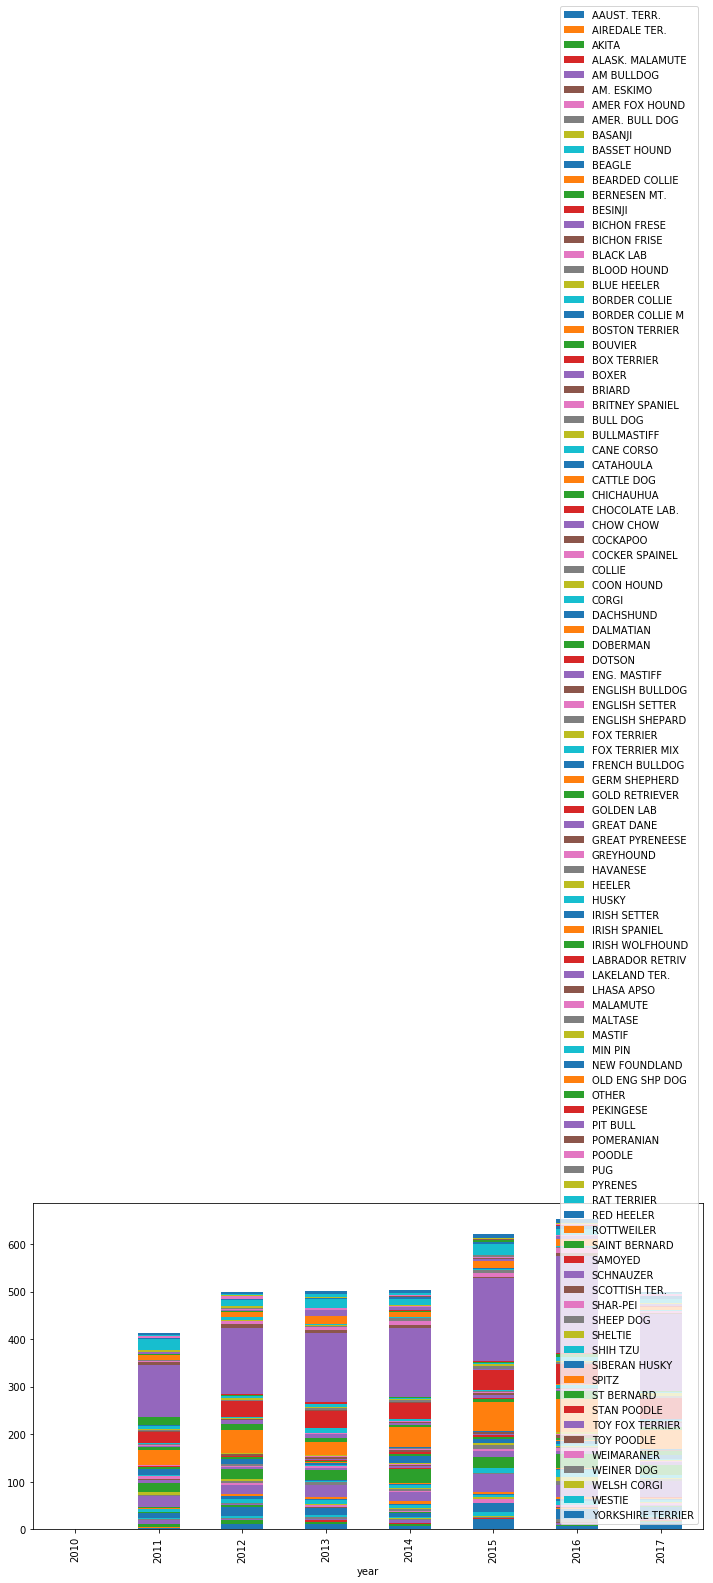

In [115]:
fig, ax = plt.subplots(figsize = (12,6))
dgstack.plot.bar(stacked=True, ax = ax)
plt.legend(loc='lower right')

In [ ]:
#OK. That's insane. Let's filter for the top 20 breeds. 

In [116]:
top_20 = dgstack[['PIT BULL', 'GERM SHEPHERD', 'LABRADOR RETRIV', 'BOXER',
       'CHICHAUHUA', 'SHIH TZU', 'BEAGLE', 'ROTTWEILER', 'AAUST. TERR.',
       'DACHSHUND', 'GOLD RETRIEVER', 'POODLE', 'BORDER COLLIE',
       'CHOW CHOW', 'YORKSHIRE TERRIER', 'GREAT DANE', 'CANE CORSO',
       'SCHNAUZER', 'POMERANIAN', 'HUSKY']]

In [118]:
top_20 = top_20.iloc[1:]

Text(0.5,1,'Bites from top 20 dog breeds')

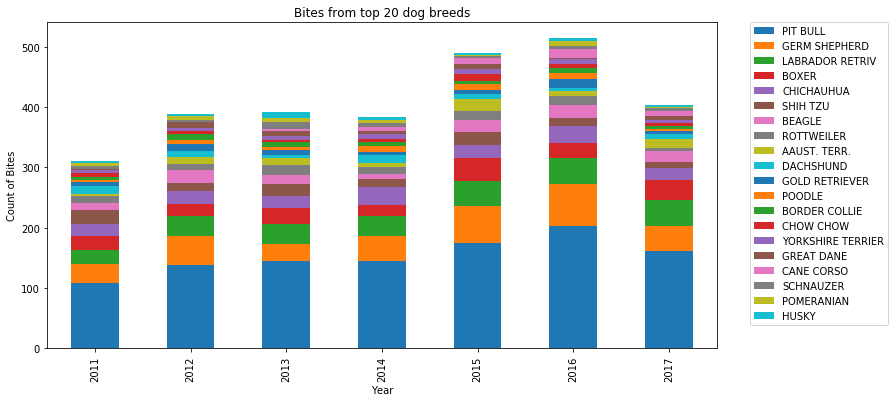

In [125]:
fig, ax = plt.subplots(figsize = (12,6))
top_20.plot.bar(stacked=True, ax = ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Year')
plt.ylabel('Count of Bites')
plt.title('Bites from top 20 dog breeds')
#plt.legend(loc='lower left')

So now we know! :)